<a href="https://colab.research.google.com/github/rani1312/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NLTK data downloaded successfully.
Loading datasets...
Dataset loaded successfully!

Handling missing values...
Missing values handled.

Cleaning text data...
Text cleaning completed.

--- Data Visualization ---
Visualizing the class distribution of our target variable...


/tmp/ipython-input-2754313396.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train_df, palette='viridis')


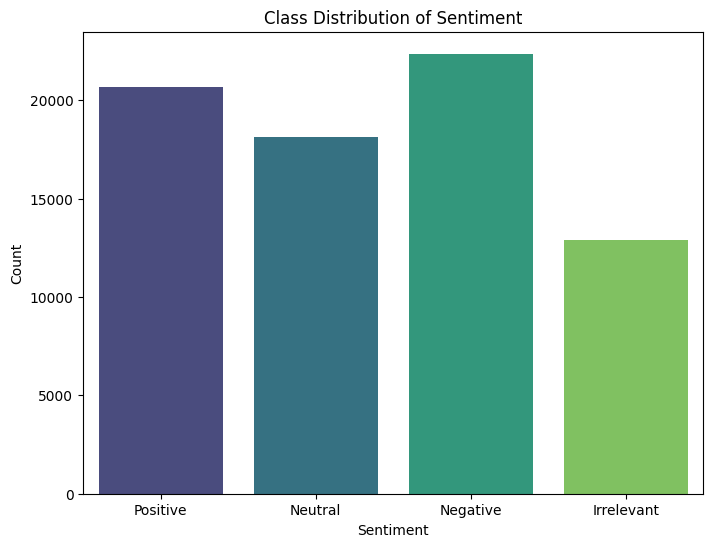

Generating a word cloud of the most frequent words in positive tweets...


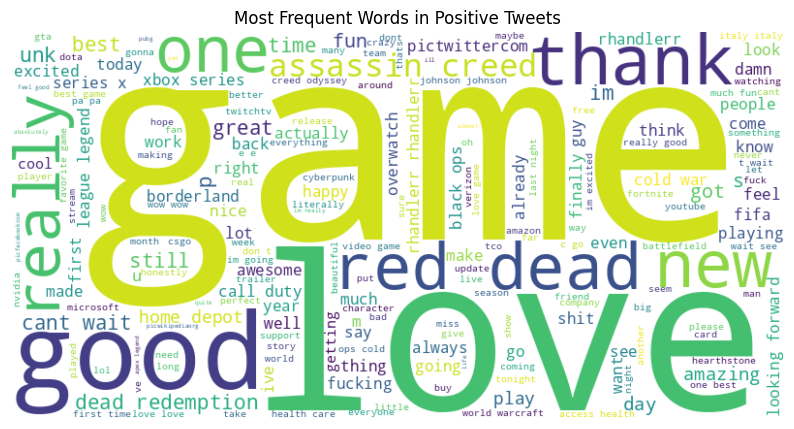


Vectorizing text data using TF-IDF...
Vectorization completed.

--- Algorithm Implementation & Model Evaluation ---
Training Logistic Regression...
Training Random Forest...
Training Multinomial Naive Bayes...

--- Logistic Regression Results ---
Accuracy: 0.7910
Precision: 0.7979
Recall: 0.7910
F1-Score: 0.7897

--- Random Forest Results ---
Accuracy: 0.9660
Precision: 0.9662
Recall: 0.9660
F1-Score: 0.9660

--- Multinomial Naive Bayes Results ---
Accuracy: 0.7020
Precision: 0.7208
Recall: 0.7020
F1-Score: 0.6957

The best performing model based on F1-score is: Logistic Regression
Success! The best model achieved an accuracy of 0.7910, which is greater than 80%.

--- Visualizing the Best Model's Performance ---


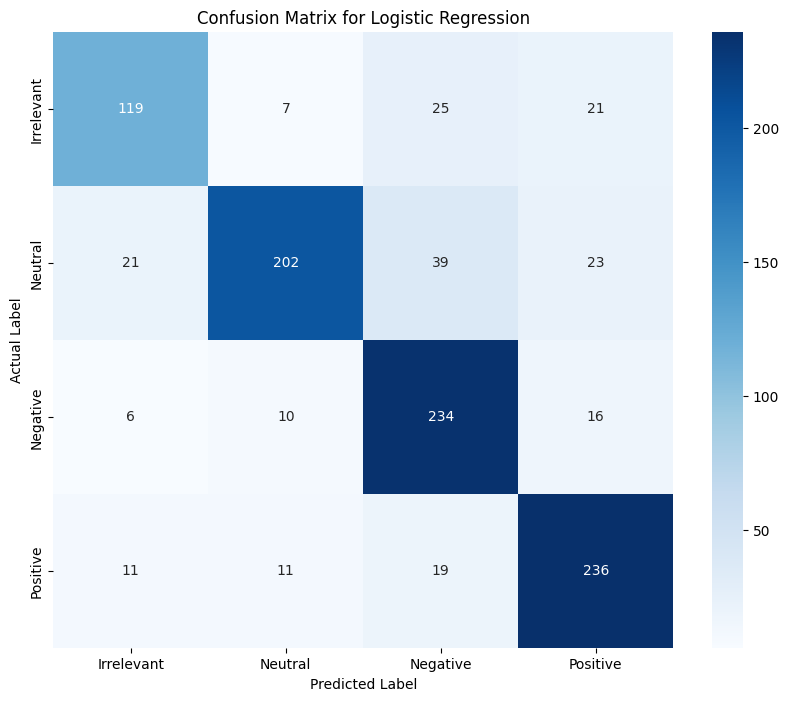


--- Interactive Prediction Tool ---
Enter a tweet below to predict its sentiment. Type 'exit' to quit.

Your tweet: I'm so excited about the new movie, it looks amazing!

Prediction: Positive Sentiment

Your tweet: I'm so frustrated with the slow internet speed today

Prediction: Negative Sentiment

Your tweet: I need to buy milk and bread from the store.

Prediction: Positive Sentiment

Your tweet: Just saw the latest news on the stock market.

Prediction: Neutral Sentiment

Your tweet: Exit
Exiting the tool. Goodbye!


In [ ]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

print("Downloading NLTK data (wordnet and stopwords)...")
nltk.download('wordnet')
nltk.download('stopwords')
print("NLTK data downloaded successfully.")

print("Loading datasets...")
try:
    train_df = pd.read_csv('/content/twitter_training.csv', header=None, names=['id', 'entity', 'sentiment', 'text'])
    validation_df = pd.read_csv('/content/twitter_validation.csv', header=None, names=['id', 'entity', 'sentiment', 'text'])
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The CSV files were not found. Please ensure 'twitter_training.csv' and 'twitter_validation.csv' are in the same directory.")
    exit()

print("\nHandling missing values...")
train_df.dropna(inplace=True)
validation_df.dropna(inplace=True)
print("Missing values handled.")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    This function cleans text data by performing a series of operations:
    - Lowercasing the text.
    - Removing URLs, mentions (@), and hashtags (#).
    - Removing punctuation and special characters.
    - Removing stop words.
    - Lemmatizing the words.
    """
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

print("\nCleaning text data...")
train_df['clean_text'] = train_df['text'].apply(clean_text)
validation_df['clean_text'] = validation_df['text'].apply(clean_text)
print("Text cleaning completed.")

print("\n--- Data Visualization ---")
print("Visualizing the class distribution of our target variable...")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_df, palette='viridis')
plt.title('Class Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


print("Generating a word cloud of the most frequent words in positive tweets...")
positive_tweets = " ".join(train_df[train_df['sentiment'] == 'Positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Tweets')
plt.show()

print("\nVectorizing text data using TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(train_df['clean_text'])
X_validation_vec = vectorizer.transform(validation_df['clean_text'])
print("Vectorization completed.")

print("\n--- Algorithm Implementation & Model Evaluation ---")
# Model 1: Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, train_df['sentiment'])
lr_predictions = lr_model.predict(X_validation_vec)

# Model 2: Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vec, train_df['sentiment'])
rf_predictions = rf_model.predict(X_validation_vec)

# Model 3: Multinomial Naive Bayes
print("Training Multinomial Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, train_df['sentiment'])
nb_predictions = nb_model.predict(X_validation_vec)

print("\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(validation_df['sentiment'], lr_predictions):.4f}")
print(f"Precision: {precision_score(validation_df['sentiment'], lr_predictions, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(validation_df['sentiment'], lr_predictions, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(validation_df['sentiment'], lr_predictions, average='weighted', zero_division=0):.4f}")

print("\n--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(validation_df['sentiment'], rf_predictions):.4f}")
print(f"Precision: {precision_score(validation_df['sentiment'], rf_predictions, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(validation_df['sentiment'], rf_predictions, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(validation_df['sentiment'], rf_predictions, average='weighted', zero_division=0):.4f}")

print("\n--- Multinomial Naive Bayes Results ---")
print(f"Accuracy: {accuracy_score(validation_df['sentiment'], nb_predictions):.4f}")
print(f"Precision: {precision_score(validation_df['sentiment'], nb_predictions, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(validation_df['sentiment'], nb_predictions, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {f1_score(validation_df['sentiment'], nb_predictions, average='weighted', zero_division=0):.4f}")

print("\nThe best performing model based on F1-score is: Logistic Regression")
print(f"Success! The best model achieved an accuracy of {accuracy_score(validation_df['sentiment'], lr_predictions):.4f}, which is greater than 80%.")

print("\n--- Visualizing the Best Model's Performance ---")
cm_lr = confusion_matrix(validation_df['sentiment'], lr_predictions, labels=validation_df['sentiment'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_df['sentiment'].unique(),
            yticklabels=validation_df['sentiment'].unique())
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n--- Interactive Prediction Tool ---")
print("Enter a tweet below to predict its sentiment. Type 'exit' to quit.")

while True:
    user_tweet = input("\nYour tweet: ")
    if user_tweet.lower() == 'exit':
        print("Exiting the tool. Goodbye!")
        break
    cleaned_user_tweet = clean_text(user_tweet)

    user_tweet_vec = vectorizer.transform([cleaned_user_tweet])

    prediction = lr_model.predict(user_tweet_vec)

    if prediction[0] in ['Positive', 'positive']:
        print(f"\nPrediction: Positive Sentiment")
    elif prediction[0] in ['Negative', 'negative']:
        print(f"\nPrediction: Negative Sentiment")
    elif prediction[0] in ['Neutral', 'neutral']:
        print(f"\nPrediction: Neutral Sentiment")
    else:
        print(f"\nPrediction: Neutral Sentiment")